In [3]:
pip install scikit-learn


In [8]:
pip install yfinance scikit-learn matplotlib pandas


  Using cached yfinance-0.2.65-py2.py3-none-any.whl.metadata (5.8 kB)
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     -------------------- ----------------- 524.3/949.2 kB 1.4 MB/s eta 0:00:01
     ------------------------------- ------ 786.4/949.2 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
 

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score



In [12]:
stock=yf.download("AAPL", start="2017-01-01", end="2025-04-30")
stock=stock.dropna()
stock.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_17148\2613228632.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock=yf.download("AAPL", start="2017-01-01", end="2025-04-30")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2017-01-03,26.827244,26.868819,26.506195,26.746404,115127600
2017-01-04,26.797224,26.910401,26.734863,26.757959,84472400
2017-01-05,26.933493,26.991235,26.748715,26.774122,88774400
2017-01-06,27.233751,27.291494,26.901153,26.972753,127007600
2017-01-09,27.483202,27.584830,27.240684,27.242992,134247600


In [15]:
stock['next_close']=stock['Close'].shift(-1)
stock.dropna(inplace=True)
x=stock[['High','Low','Open','Volume']]
y=stock['next_close']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)

FOR LINEAR REGRESSION


In [19]:
print("Linear Reg")
print("MSE",mean_squared_error(y_test,y_pred))
print("R2",r2_score(y_test,y_pred))

Linear Reg
MSE 14.244879266645043
R2 0.9780121011011734


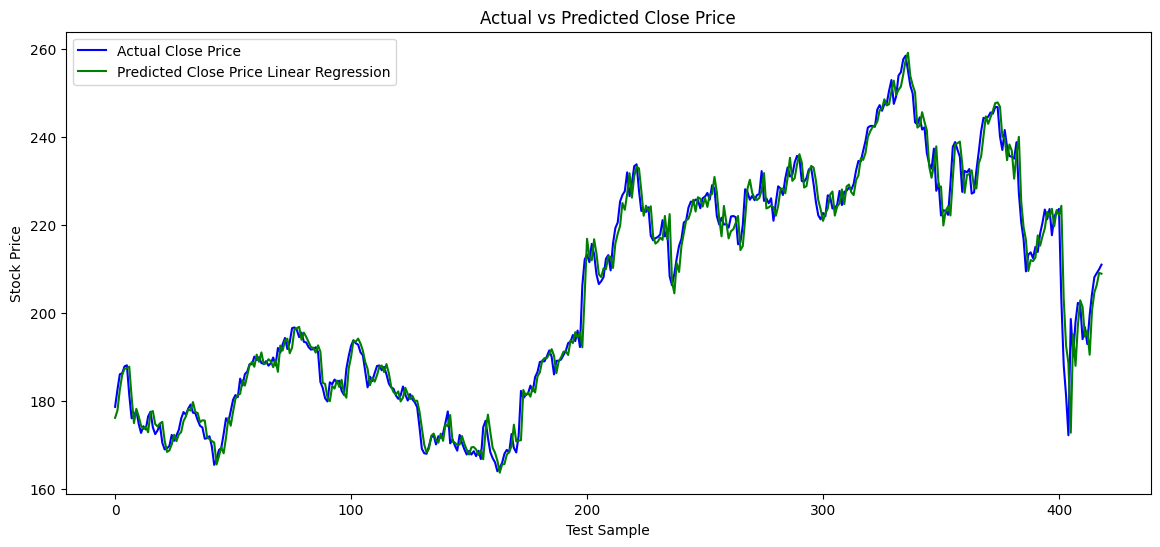

In [20]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values,label="Actual Close Price",color="blue")
plt.plot(y_pred,label="Predicted Close Price Linear Regression",color="green")
plt.title("Actual vs Predicted Close Price")
plt.xlabel("Test Sample")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

FOR RANDOM FOREST


In [26]:

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

In [27]:
print('Random FOrest')
print("MSE",mean_squared_error(y_test,y_pred_rf))
print("R2",r2_score(y_test,y_pred_rf))

Random FOrest
MSE 707.6023298325127
R2 -0.09223028133082822


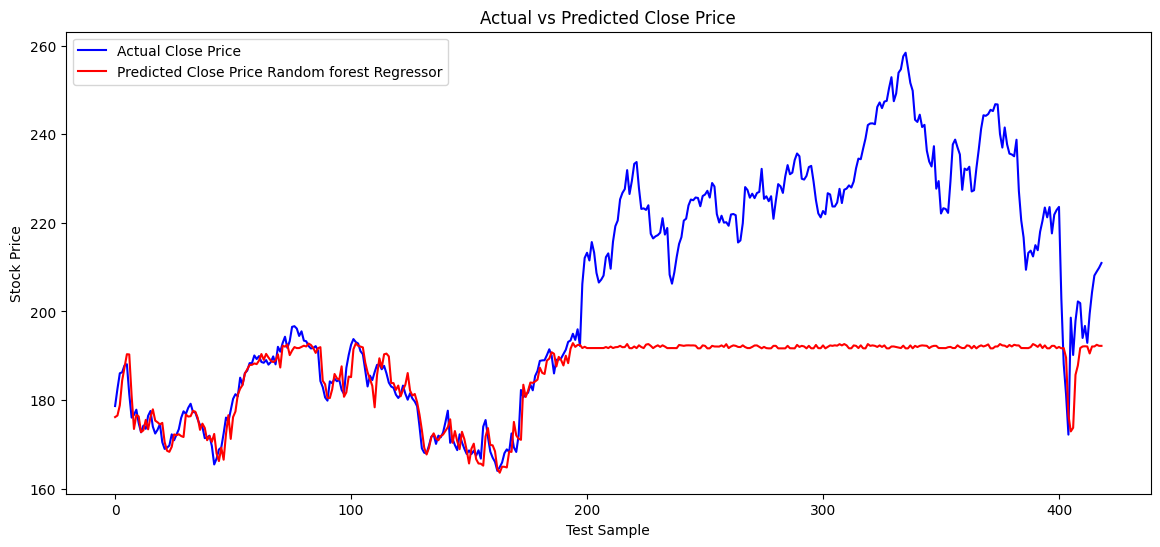

In [28]:
plt.figure(figsize=(14,6))
plt.plot(y_test.values,label="Actual Close Price",color="blue")
plt.plot(y_pred_rf,label="Predicted Close Price Random forest Regressor",color="red")
plt.title("Actual vs Predicted Close Price")
plt.xlabel("Test Sample")
plt.ylabel("Stock Price")
plt.legend()
plt.show()